<!DOCTYPE html>
<html>
<head>
<style>
  body {
    font-family: cursive;
  }

  .center {
    text-align: center;
  }

  .blue {
    color: blue;
  }

  .cursive {
    font-family: cursive;
  }

  .newtimeroman {
    font-family: newtimeroman;
  }

  .bigger-text {
    font-size: 250%; /* Adjust the font size as needed */
  }

  .uppercase {
    text-transform: uppercase;
  }
</style>
</head>
<body>

<!-- Centered Content -->
<div class="center">


  <!-- Task Description -->
 # <p><center style="font-family:newtimeroman;font-size:1080%;">BHARATH INTERN </center></p>
  </p>

 # <p class="cursive blue" style="font-size: 1080%;">TASK 3 </center></p>


# <p><center style="font-family:newtimeroman;font-size:1080%;">Dogs🐶 & Cats😺 Classifier </center></p>

  <!-- Image -->
  <div class="center">
    <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F12053762%2F3c94ab343f0e44a43b6f3563a7116373%2FXUGEPVQJJMI6LBP3WAQRGYECEI.jpg?generation=1695786557088668&alt=media" alt="Dogs and Cats">
  </div>

</div>

</body>
</html>


In [1]:
from google.colab import files

# Upload the Kaggle API key
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:06<00:00, 197MB/s]
100% 812M/812M [00:06<00:00, 125MB/s]


<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Import Libraries
</h1>

# 1 . Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob as gb
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from tqdm import tqdm
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam

from keras.applications import DenseNet121
from keras.applications import ResNet50V2
from keras.applications import ResNet152V2
from keras.applications import InceptionV3
from keras.applications import Xception

from google.colab.patches import cv2_imshow
from PIL import Image

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Preprocessing
</h1>

# 2.Preprocessing

In [5]:
# extracting the compressed dataset
from zipfile import ZipFile


dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')



The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os

# counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)

print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.11924.jpg', 'cat.9889.jpg', 'dog.3669.jpg', 'cat.4918.jpg', 'cat.10604.jpg', 'dog.7606.jpg', 'dog.3068.jpg', 'dog.8049.jpg', 'cat.2164.jpg', 'cat.4833.jpg', 'dog.10738.jpg', 'cat.9005.jpg', 'dog.859.jpg', 'cat.12024.jpg', 'dog.5197.jpg', 'dog.11139.jpg', 'cat.10223.jpg', 'dog.3510.jpg', 'cat.11120.jpg', 'cat.2063.jpg', 'dog.3826.jpg', 'dog.5166.jpg', 'dog.1519.jpg', 'dog.11220.jpg', 'dog.12148.jpg', 'cat.1872.jpg', 'dog.7179.jpg', 'cat.9064.jpg', 'cat.4640.jpg', 'cat.8415.jpg', 'cat.8145.jpg', 'cat.8010.jpg', 'dog.1411.jpg', 'dog.1142.jpg', 'cat.3432.jpg', 'cat.11412.jpg', 'dog.2845.jpg', 'dog.825.jpg', 'dog.7862.jpg', 'cat.3697.jpg', 'dog.8865.jpg', 'dog.6015.jpg', 'cat.8149.jpg', 'cat.6108.jpg', 'cat.5835.jpg', 'dog.1655.jpg', 'dog.655.jpg', 'dog.6957.jpg', 'cat.7858.jpg', 'cat.5371.jpg', 'cat.10103.jpg', 'cat.5051.jpg', 'cat.9172.jpg', 'dog.505.jpg', 'dog.11116.jpg', 'dog.1277.jpg', 'dog.1700.jpg', 'cat.4243.jpg', 'dog.12034.jpg', 'dog.2500.jpg', 'cat.6897.jpg', 'cat.5688.jpg'

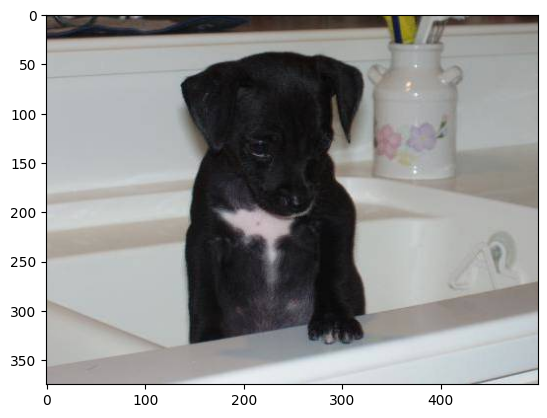

In [10]:

img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

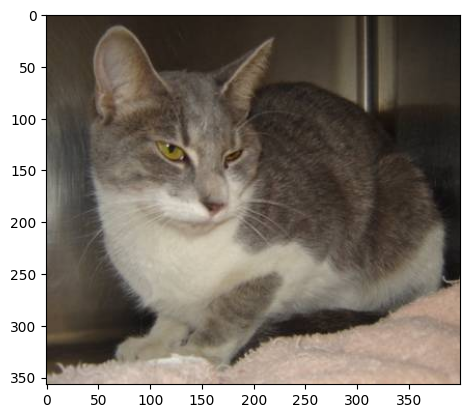

In [11]:
#display cat image

img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)

plt.show

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
dog
cat
cat


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0

cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
      cat_count += 1

      print('Number of dog images =', dog_count)
      print('Number of cat images =', cat_count)

Streaming output truncated to the last 5000 lines.
Number of dog images = 10053
Number of cat images = 10001
Number of dog images = 10053
Number of cat images = 10002
Number of dog images = 10053
Number of cat images = 10003
Number of dog images = 10053
Number of cat images = 10004
Number of dog images = 10054
Number of cat images = 10005
Number of dog images = 10057
Number of cat images = 10006
Number of dog images = 10061
Number of cat images = 10007
Number of dog images = 10065
Number of cat images = 10008
Number of dog images = 10065
Number of cat images = 10009
Number of dog images = 10065
Number of cat images = 10010
Number of dog images = 10065
Number of cat images = 10011
Number of dog images = 10066
Number of cat images = 10012
Number of dog images = 10070
Number of cat images = 10013
Number of dog images = 10070
Number of cat images = 10014
Number of dog images = 10070
Number of cat images = 10015
Number of dog images = 10070
Number of cat images = 10016
Number of dog images 

In [15]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [16]:
original_folder = '/content/train/'

resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)

  img = img.resize((224, 224))

  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

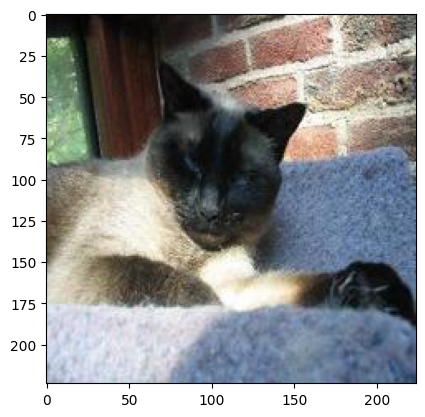

In [18]:
# display resized cat image

img = mpimg.imread('/content/image resized/cat.10061.jpg')
imgplt = plt.imshow(img)
plt.show()

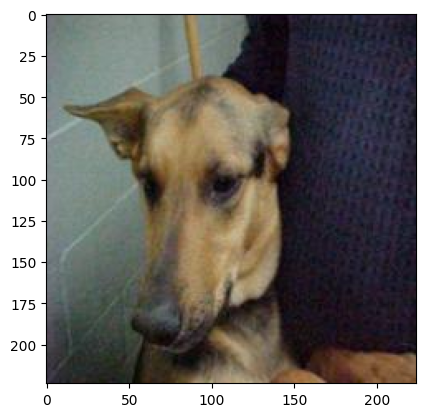

In [21]:
# display resized dog image

img = mpimg.imread('/content/image resized/dog.10160.jpg')
imgplt = plt.imshow(img)
plt.show()

Converting the resized labels as

Dog  - 1

Cat  - 0


In [22]:
# creaing a for Loop to assign Labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [23]:
print(filenames [0:5])

print(len(filenames))

['cat.11924.jpg', 'cat.9889.jpg', 'dog.3669.jpg', 'cat.4918.jpg', 'cat.10604.jpg']
2000


In [24]:
print(labels [0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [25]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique (labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1004  996]


In [26]:
image_directory = '/content/image resized/'

image_extension = ['png', 'jpg']

files = []

[files.extend(gb.glob(image_directory +'*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[ 26  55  76]
   [ 31  62  85]
   [ 46  81 107]
   ...
   [ 46  71  81]
   [ 43  70  80]
   [ 42  69  79]]

  [[ 14  43  64]
   [ 27  58  81]
   [ 50  83 109]
   ...
   [ 46  71  81]
   [ 43  70  80]
   [ 42  69  79]]

  [[  5  32  53]
   [ 27  58  81]
   [ 55  89 113]
   ...
   [ 43  69  81]
   [ 42  68  80]
   [ 41  67  79]]

  ...

  [[ 41  40  36]
   [ 45  44  40]
   [ 51  46  43]
   ...
   [ 50  72  84]
   [ 49  71  83]
   [ 49  71  83]]

  [[ 42  41  37]
   [ 46  45  41]
   [ 53  48  45]
   ...
   [ 49  71  83]
   [ 48  70  82]
   [ 48  70  82]]

  [[ 42  41  37]
   [ 46  45  41]
   [ 53  48  45]
   ...
   [ 49  71  83]
   [ 48  70  82]
   [ 48  70  82]]]


 [[[190 184 173]
   [178 173 164]
   [148 149 140]
   ...
   [ 85  98 100]
   [ 84  98  97]
   [ 96 110 109]]

  [[189 183 172]
   [179 174 165]
   [151 152 143]
   ...
   [ 83  96  98]
   [ 84  98  97]
   [ 98 112 111]]

  [[186 180 169]
   [181 176 167]
   [155 156 147]
   ...
   [ 83  96  98]
   [ 86 100  99]
   [102 116

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images

Y = np.asarray(labels)

Training the model

Train Test Split

Test = 20%  where Test = 0.20

Train = 80% where Train = 0.80

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[0.2627451  0.41960784 0.46666667]
   [0.26666667 0.43529412 0.47058824]
   [0.68235294 0.8627451  0.89019608]
   ...
   [0.16862745 0.25882353 0.17254902]
   [0.25882353 0.36078431 0.27058824]
   [0.23529412 0.3372549  0.24705882]]

  [[0.         0.07843137 0.1254902 ]
   [0.1372549  0.30588235 0.34117647]
   [0.55294118 0.73333333 0.76078431]
   ...
   [0.17254902 0.2627451  0.17647059]
   [0.27843137 0.38039216 0.29019608]
   [0.31764706 0.41960784 0.32941176]]

  [[0.0745098  0.23529412 0.27058824]
   [0.23529412 0.40392157 0.43921569]
   [0.27058824 0.45098039 0.47843137]
   ...
   [0.25882353 0.35294118 0.25882353]
   [0.17254902 0.2745098  0.18039216]
   [0.2745098  0.37647059 0.28235294]]

  ...

  [[0.18823529 0.42745098 0.41176471]
   [0.28627451 0.50980392 0.51372549]
   [0.34117647 0.55686275 0.59215686]
   ...
   [0.14509804 0.21568627 0.30588235]
   [0.09019608 0.17647059 0.2745098 ]
   [0.         0.09019608 0.19215686]]

  [[0.14509804 0.40392157 0.35686275]
   [0.1

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

# Define the MobileNetV2 model URL
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

# Number of classes in your classification problem
NUM_CLASSES = 2

# Create a Keras layer using the MobileNetV2 model from TensorFlow Hub
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3))

# Create a simple classification model using the pretrained MobileNetV2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(units=NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [37]:
model.compile(

  optimizer = 'adam',

  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

  metrics = ['acc']

)

In [38]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 79s 1s/step - loss: 0.1900 - acc: 0.9169
Epoch 2/5
50/50 [==============================] - 74s 1s/step - loss: 0.0526 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 75s 2s/step - loss: 0.0340 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 74s 1s/step - loss: 0.0236 - acc: 0.9962
Epoch 5/5
50/50 [==============================] - 81s 2s/step - loss: 0.0182 - acc: 0.9981


In [41]:
score, acc = model.evaluate(X_test_scaled, Y_test)

print('Test Loss =', score)

print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0580 - acc: 0.9775
Test Loss = 0.058005914092063904
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/image resized/cat.9865.jpg


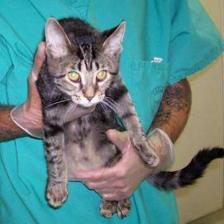

1/1 [==============================] - 1s 1s/step
[[9.9994409e-01 5.5882043e-05]]
0
The image represents a Cat


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:

  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/image resized/dog.10160.jpg


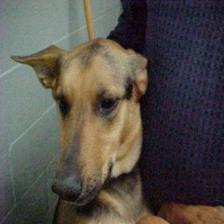

1/1 [==============================] - 0s 103ms/step
[[0.00117172 0.99882823]]
1
The image represents a Dog


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:

  print('The image represents a Cat')

else:
  print('The image represents a Dog')